In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread
from scipy.misc import imresize
from skimage.transform import resize

In [12]:
files = os.listdir("GEI_Extraction_CASIA_B-master\\GEI_CASIA_B\\gei\\053\\nm-01\\090\\")
images = [imread("GEI_Extraction_CASIA_B-master\\GEI_CASIA_B\\gei\\053\\nm-01\\090\\"+f) for f in files]

In [29]:
import os # attempt to automate the process, fail

rootdir = "GEI_Extraction_CASIA_B-master\\GEI_CASIA_B\\gei\\053\\nm-01\\"

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        os.path.join(subdir, file)
        filepath = subdir + os.sep + file

        if filepath.endswith(".png"):
            print (filepath)

GEI_Extraction_CASIA_B-master\GEI_CASIA_B\gei\053\nm-01\\053-nm-01-000.png
GEI_Extraction_CASIA_B-master\GEI_CASIA_B\gei\053\nm-01\\053-nm-01-018.png
GEI_Extraction_CASIA_B-master\GEI_CASIA_B\gei\053\nm-01\\053-nm-01-036.png
GEI_Extraction_CASIA_B-master\GEI_CASIA_B\gei\053\nm-01\\053-nm-01-054.png
GEI_Extraction_CASIA_B-master\GEI_CASIA_B\gei\053\nm-01\\053-nm-01-072.png
GEI_Extraction_CASIA_B-master\GEI_CASIA_B\gei\053\nm-01\\053-nm-01-090.png
GEI_Extraction_CASIA_B-master\GEI_CASIA_B\gei\053\nm-01\\053-nm-01-108.png
GEI_Extraction_CASIA_B-master\GEI_CASIA_B\gei\053\nm-01\\053-nm-01-126.png
GEI_Extraction_CASIA_B-master\GEI_CASIA_B\gei\053\nm-01\\053-nm-01-144.png
GEI_Extraction_CASIA_B-master\GEI_CASIA_B\gei\053\nm-01\\053-nm-01-162.png
GEI_Extraction_CASIA_B-master\GEI_CASIA_B\gei\053\nm-01\\053-nm-01-180.png
GEI_Extraction_CASIA_B-master\GEI_CASIA_B\gei\053\nm-01\000\053-nm-01-000-001.png
GEI_Extraction_CASIA_B-master\GEI_CASIA_B\gei\053\nm-01\000\053-nm-01-000-002.png
GEI_Extract

GEI_Extraction_CASIA_B-master\GEI_CASIA_B\gei\053\nm-01\144\053-nm-01-144-059.png
GEI_Extraction_CASIA_B-master\GEI_CASIA_B\gei\053\nm-01\144\053-nm-01-144-060.png
GEI_Extraction_CASIA_B-master\GEI_CASIA_B\gei\053\nm-01\144\053-nm-01-144-061.png
GEI_Extraction_CASIA_B-master\GEI_CASIA_B\gei\053\nm-01\144\053-nm-01-144-062.png
GEI_Extraction_CASIA_B-master\GEI_CASIA_B\gei\053\nm-01\144\053-nm-01-144-063.png
GEI_Extraction_CASIA_B-master\GEI_CASIA_B\gei\053\nm-01\144\053-nm-01-144-064.png
GEI_Extraction_CASIA_B-master\GEI_CASIA_B\gei\053\nm-01\144\053-nm-01-144-065.png
GEI_Extraction_CASIA_B-master\GEI_CASIA_B\gei\053\nm-01\144\053-nm-01-144-066.png
GEI_Extraction_CASIA_B-master\GEI_CASIA_B\gei\053\nm-01\144\053-nm-01-144-067.png
GEI_Extraction_CASIA_B-master\GEI_CASIA_B\gei\053\nm-01\144\053-nm-01-144-068.png
GEI_Extraction_CASIA_B-master\GEI_CASIA_B\gei\053\nm-01\144\053-nm-01-144-069.png
GEI_Extraction_CASIA_B-master\GEI_CASIA_B\gei\053\nm-01\144\053-nm-01-144-070.png
GEI_Extraction_C

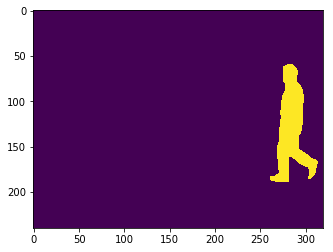

In [30]:
plt.imshow(images[0])

In [31]:
def mass_center(img,is_round=True):
    Y = img.mean(axis=1)
    X = img.mean(axis=0)
    Y_ = np.sum(np.arange(Y.shape[0]) * Y)/np.sum(Y)
    X_ = np.sum(np.arange(X.shape[0]) * X)/np.sum(X)
    if is_round:
        return int(round(X_)),int(round(Y_))
    return X_,Y_

def image_extract(img,newsize):
    x_s = np.where(img.mean(axis=0)!=0)[0].min()
    x_e = np.where(img.mean(axis=0)!=0)[0].max()
    
    y_s = np.where(img.mean(axis=1)!=0)[0].min()
    y_e = np.where(img.mean(axis=1)!=0)[0].max()
    
    x_c,_ = mass_center(img)
#     x_c = (x_s+x_e)//2
    x_s = x_c-newsize[1]//2
    x_e = x_c+newsize[1]//2
    img = img[y_s:y_e,x_s if x_s>0 else 0:x_e if x_e<img.shape[1] else img.shape[1]]
    return imresize(img,newsize)

In [32]:
images = [image_extract(i,(128,64)) for i in images]

C:\Users\User\.conda\envs\Astor\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.


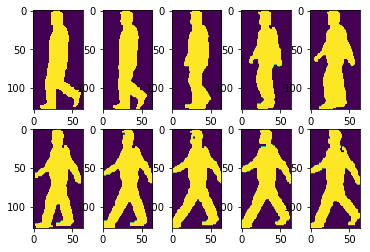

In [33]:
plt.figure()
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(images[i])
plt.show()

In [34]:
gei = np.mean(images,axis=0)

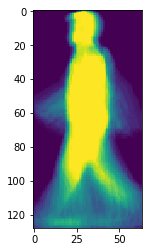

In [35]:
plt.imshow(gei)
plt.show()